In [21]:
import os 
import zipfile
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        print(e)

In [3]:
OUTPUT_DIR = '../GTSRB/Output'
OUTPUT_READABLE_LABELS = os.path.join(OUTPUT_DIR, "labels_readable.txt")

In [4]:
UNZIP_DATA_PATH = '../GTSRB/Dataset'

In [5]:
to_unpack = [
    ("../GTSRB/gtsrb/GTSRB_Final_Training_Images.zip", UNZIP_DATA_PATH),
    ("../GTSRB/gtsrb/GTSRB_Final_Test_Images.zip", UNZIP_DATA_PATH),
    ("../GTSRB/gtsrb/GTSRB_Final_Test_GT.zip", UNZIP_DATA_PATH)
]
 
for file, directory in to_unpack:
    print("Unzipping {} to {}...".format(file, directory))
    with zipfile.ZipFile(file,"r") as zip_ref:
        zip_ref.extractall(directory)

In [6]:
categories ={
    0: '20_speed',
    1: '30_speed',
    2: '50_speed',
    3: '60_speed',
    4: '70_speed',
    5: '80_speed',
    6: '80_lifted',
    7: '100_speed',
    8: '120_speed',
    9: 'no_overtaking_general',
    10: 'no_overtaking_trucks',
    11: 'right_of_way_crossing',
    12: 'right_of_way_general',
    13: 'give_way',
    14: 'stop',
    15: 'no_way_general',
    16: 'no_way_trucks',
    17: 'no_way_one_way',
    18: 'attention_general',
    19: 'attention_left_turn',
    20: 'attention_right_turn',
    21: 'attention_curvy',
    22: 'attention_bumpers',
    23: 'attention_slippery',
    24: 'attention_bottleneck',
    25: 'attention_construction',
    26: 'attention_traffic_light',
    27: 'attention_pedestrian',
    28: 'attention_children',
    29: 'attention_bikes',
    30: 'attention_snowflake',
    31: 'attention_deer',
    32: 'lifted_general',
    33: 'turn_right',
    34: 'turn_left',
    35: 'turn_straight',
    36: 'turn_straight_right',
    37: 'turn_straight_left',
    38: 'turn_right_down',
    39: 'turn_left_down',
    40: 'turn_circle',
    41: 'lifted_no_overtaking_general',
    42: 'lifted_no_overtaking_trucks'
}

In [7]:
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [8]:
# Write labels name to csv file
file = open(OUTPUT_READABLE_LABELS, 'w')
for key, val in sorted(label_map.items()):
    file.write("{}\n".format(val))
file.close()

In [12]:
ROOT = '../GTSRB/Dataset'
TRAIN_DATA_PATH = os.path.join(ROOT, 'GTSRB/Final_Training/Images')
TEST_DATA_PATH = os.path.join(ROOT, 'GTSRB/Final_Test/Images')

TRAINING_DATA_DIR = os.path.join(ROOT, 'train')
TEST_JPG_DATA_DIR= os.path.join(ROOT, 'test')

In [15]:
if not os.path.exists(TRAINING_DATA_DIR):
    os.makedirs(TRAINING_DATA_DIR)
    
if not os.path.exists(TEST_JPG_DATA_DIR):
    os.makedirs(TEST_JPG_DATA_DIR)

In [72]:
# Get all subdirectories of data_dir. Each represents a label.
directories = [d for d in os.listdir(TRAIN_DATA_PATH) 
               if os.path.isdir(os.path.join(TRAIN_DATA_PATH, d))]

# Loop through the label directories and collect the data in two lists, labels and images.
ppm_files_train = []
ppm_labels_train = []

for dic in directories:
    label_dir = os.path.join(TRAIN_DATA_PATH, dic)
    file_names = [os.path.join(label_dir, f) 
                  for f in os.listdir(label_dir) if f.endswith(".ppm")]
    for image_file in file_names:
        ppm_files_train.append(image_file)
        ppm_labels_train.append(dic)
        
ppm_files_train.sort()
ppm_labels_train.sort()

In [73]:
# Convert
# from: dataset/Final_Training/Images/00000/00000_00000.ppm
# to:   dataset/training/00000/00000_00000.jpg

for ppm_file, label in zip(ppm_files_train, ppm_labels_train):
    image = Image.open(ppm_file)
    directory = os.path.join(TRAINING_DATA_DIR, label)
    image_filename = "{}.jpg".format(os.path.splitext(os.path.basename(ppm_file))[0])

    if not os.path.exists(directory):
        os.makedirs(directory)
    
    image.save(os.path.join(directory, image_filename))

In [87]:
tmp_validation_data_files = [f for f in os.listdir(TEST_DATA_PATH) if f.endswith(".ppm")]
test_images = []

#export as JPGs
for ppm_file in tmp_validation_data_files:
    image_dir = os.path.join(TEST_DATA_PATH, ppm_file) 
    image = Image.open(image_dir)
    directory = TEST_JPG_DATA_DIR
    image_filename = "{}.jpg".format(os.path.splitext(os.path.basename(ppm_file))[0])

    if not os.path.exists(directory):
        os.makedirs(directory)
        
    final_image = os.path.join(directory, image_filename)
    image.save(final_image)

    test_images.append(final_image)
    test_images.sort()
    
print("Test images count:", len(test_images))

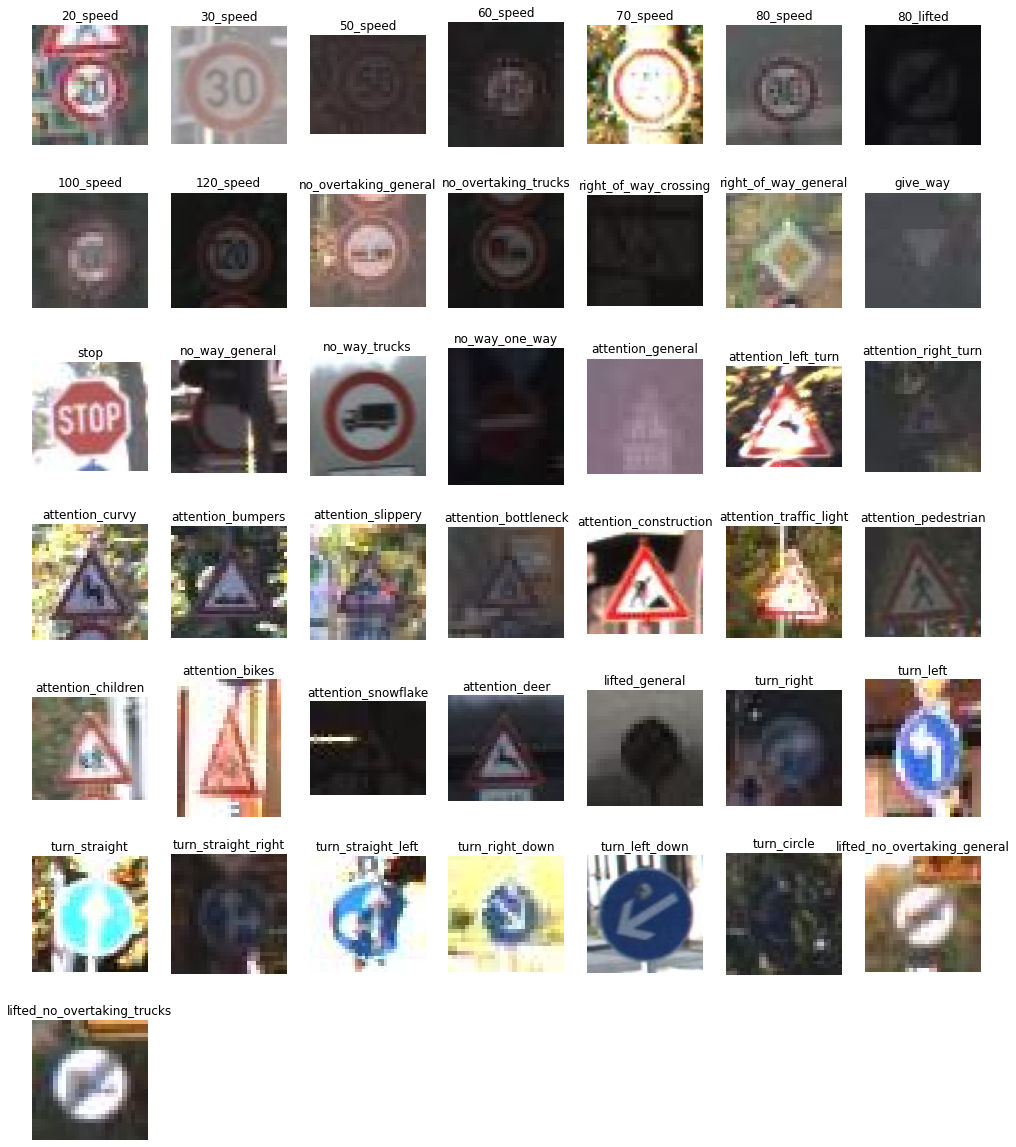

In [17]:
preprocessed_training_dirs = [d for d in os.listdir(TRAINING_DATA_DIR) 
               if os.path.isdir(os.path.join(TRAINING_DATA_DIR, d))]
preprocessed_training_dirs.sort()

training_images = []
for training_dir in preprocessed_training_dirs:
    training_images.append(os.path.join(TRAINING_DATA_DIR, training_dir, "00000_00000.jpg"))

i = 0
plt.figure(figsize=(17, 30))
for image in training_images:
    plt.subplot(10,7, i + 1)
    plt.axis('off')
    plt.title("{}".format(categories[i]))
    i += 1
    plt.imshow(Image.open(image))
plt.show()

In [20]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 64

In [19]:
image_generator = ImageDataGenerator(rescale=1/255,
                                     rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.01,
                                     zoom_range=[0.9, 1.25],
                                     brightness_range=[0.5, 1.5])

train_dataset = image_generator.flow_from_directory((TRAINING_DATA_DIR), target_size=IMAGE_SHAPE, batch_size=BATCH_SIZE, shuffle = True, seed=42)
# test_dataset = image_generator.flow_from_directory((VALIDATION_DATA_DIR), target_size=IMAGE_SHAPE, batch_size=BATCH_SIZE, shuffle = False, seed=42)

Found 39209 images belonging to 43 classes.


In [24]:
# MODEL ARCHITECTURE
